# 2D Design Template

# Overview

The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression or logistic regression, as well as using metrics to measure the accuracy of your model. 

Please find the project handout description in the following link:
- [DDW-MU-Humanities Handout](https://sutdapac-my.sharepoint.com/:b:/g/personal/franklin_anariba_sutd_edu_sg/EaonbI8dXvFHr5I75zUAhGEBXflfC4aZEqtcxPYHS5Jciw?e=s6UTbq)
- [DDW-MU-SocialStudies Handout](https://sutdapac-my.sharepoint.com/:b:/g/personal/franklin_anariba_sutd_edu_sg/ETaVN6doTnJElS0Egw34XYQB_VYCwijjNk_05Ft4RctYjg?e=X8iVbw)

There are two parts.
- Part 1 is related to predicting COVID-19 deaths
- Part 2 is open ended and you can find the problem of your interest as long as it is related to COVID-19. The only requirements are the following:
    - The problem can be modelled either using Linear Regression (or Multiple Linear Regression) or Logistic Regression. This means either you are working with continous numerical data or classification. You are not allowed to use Neural Networks or other Machine Learning models.
    - You must use Python and Jupyter Notebook

The following tasks are a general guide to help you do your project for Part 2:
1. Find an interesting problem which you can solve either using Linear Regression or Classification
1. Find a dataset to build your model. You can use [Kaggle](https://www.kaggle.com/datasets) to find your datasets.
1. Use plots to visualize and understand your data.
1. Create training and test data set.
1. Build your model
1. Use metrics to evaluate your model.
1. Improve your model

## Deliverables

You need to submit this Jupyter notebook together with the dataset into Vocareum. Use the template in this notebook to work on this project.

## Rubrics

The rubrics for the scoring can be found in [this link](https://sutdapac-my.sharepoint.com/:b:/g/personal/franklin_anariba_sutd_edu_sg/EdLkuzyCrrJBp5QfVGtdHn8Bj3_epWiQMqv2mwyEei_3JQ?e=fLB0QN).

## Students Submission

Student's Name:
- Aster Angelic Leong
- Joseph Lai
- Vedika Sairam Poonamalle
- Raymond Harrison

# Part 1

Write your report here

**1. Start by importing functions from cohort and homework 9**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# functions from cohort and homework week 9

def normalize_z(df):
    return ((df - df.mean(axis=0))/df.std(axis=0))

def get_features_targets(df, feature_names, target_names):
    # get df of selected features
    df_feature = df[feature_names]
    # get df of selected targets
    df_target = df[target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    # number of columns in the dataframe
    cols = len(df_feature.columns)
    # convert df to numpy
    feature = df_feature.to_numpy().reshape(-1,cols)
    array = np.concatenate((np.ones((feature.shape[0],1)), feature), axis = 1)
    return array

def prepare_target(df_target):
    cols = len(df_target.columns)
    target = df_target.to_numpy().reshape(-1,cols)
    return target

def predict(df_feature, beta):
    df_feature = normalize_z(df_feature)
    preped_feature = prepare_feature(df_feature)
    return predict_norm(preped_feature, beta)

def predict_norm(X, beta):
    return np.matmul(X,beta)

def split_data(df_feature, df_target, random_state=100, test_size=0.3):
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    k = int(test_size * len(indexes))
    test_index = np.random.choice(indexes, k, replace=False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index
    # the above indexes just helps you to get random indexes within the entire data
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def r2_score(y, ypred):
    ss_res = np.sum((y-ypred)**2)
    y_mean = np.mean(y)
    ss_tot = np.sum((y-y_mean)**2)
    r_2 = (1-(ss_res/ss_tot))
    return r_2

def mean_squared_error(target, pred):
    num_data = target.shape[0]
    return (1/num_data)*(np.sum((target-pred)**2))

def mean_absolute_error(target,pred):
    num_data = target.shape[0]
    return (1/num_data)*(abs(np.sum(target-pred)))

def compute_cost(X, y, beta): #beta is weighted values, in this case it is just choosen from random values
    J = 0
    number_of_samples = X.shape[0]
    error = np.matmul(X, beta) - y
    error_sq = np.matmul(error.T, error)
    J = (1)/(2*number_of_samples) * error_sq 
    J = J[0][0]
    return J

def gradient_descent(X, y, beta, alpha, num_iters):
    number_of_samples = X.shape[0]
    J_storage = []
    for i in range(num_iters):
        derivative_error = (1/(number_of_samples)) * np.matmul(X.T, (np.matmul(X, beta) - y))
        beta = beta - alpha *  derivative_error
        J_storage.append(compute_cost(X, y, beta))
    return beta, J_storage   



**2. Create function to make the model that we will use to compare with our results from excel**



In [10]:
# single function to make the model
# @args
# 1. alpha-value (step for gradient descent)
# 2. beta (starting beta values for gradient descent)
# 3. iterations (number of iterations of gradient descent)
# 4. feature_parameters (features used to train model)
# 5. dataset used
# 6. target column (target value that we are predicting)
# @return r^2, mse values, mae value, predicted values, targeting testing values and features used for testing

def make_model_vs_excel(alpha, beta, iterations, feature_parameters = ["total_cases","new_cases_smoothed","total_cases_per_million","new_cases_smoothed_per_million","reproduction_rate","positive_rate"], dataset = "Data/Task 1/countries_covid_data_total_features_final_csv.csv" , target_column = ["new_deaths_smoothed"]):
    df = pd.read_csv(dataset)
    
    # Extract the features and the target
    df_features, df_target = get_features_targets(df,feature_parameters,target_column)

    # Split data into training and testing features and targets
    df_features_train = df_features.loc[0:2099]
    df_target_train = df_target.loc[0:2099]

    df_features_test = df_features.loc[2100:]
    df_target_test = df_target.loc[2100:]
    

    # Normalize the features using z normalization
    df_features_train_z = normalize_z(df_features_train)

    # Change the features and the target to numpy array using the prepare functions
    X = prepare_feature(df_features_train_z)
    target = prepare_target(df_target_train)

    # Call the gradient_descent function
    beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)


    # call the predict() method
    pred = predict(df_features_test,beta)

    target = prepare_target(df_target_test)

    r2 = r2_score(target,pred)
    mse = mean_squared_error(target, pred)
    mae = mean_absolute_error(target, pred)
    return r2, mse, mae, pred, df_target_test, df_features_test, beta

**3. Use our model to find the r<sup>2</sup> value, Mean Squared Error, Mean Absolute Error and Beta Coefficients**

In [3]:
# Calculate metrics for our model
r2, mse, mae, pred, target, df_features_test, beta = make_model_vs_excel(0.01, np.zeros((7,1)),3300)
print(f"r^2 value = {r2}, mean squared error = {mse}, mean absolute error = {mae}")
print("beta coefficients are", beta)

r^2 value = 0.3774323914212878, mean squared error = 1017.384113172374, mean absolute error = 9.01552090629809
beta coefficients are [[15.94946619]
 [ 4.01526285]
 [11.79893949]
 [-1.81345683]
 [ 3.05408047]
 [-2.75698124]
 [ 3.07024792]]


**4. Call <code>make_model_vs_excel()</code> for each individual feature to determine difference in target and predicted values **

Text(0, 0.5, 'New Deaths Smoothed')

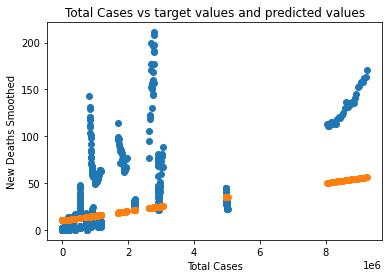

In [4]:
# Plot individual features against target values and predicted values

r2, mse, mae, pred, target, df_features_test, beta = make_model_vs_excel(0.01, np.zeros((2,1)),3300, ["total_cases"])
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("Total Cases vs target values and predicted values")
plt.xlabel("Total Cases")
plt.ylabel("New Deaths Smoothed")

Text(0, 0.5, 'New Deaths Smoothed')

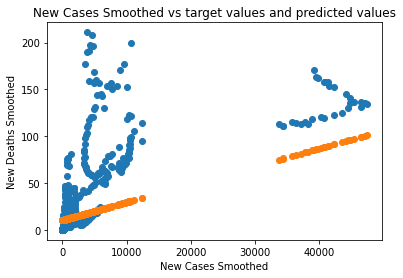

In [5]:
r2, mse, mae, pred, target, df_features_test, beta = make_model_vs_excel(0.01, np.zeros((2,1)),3300, ["new_cases_smoothed"])
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("New Cases Smoothed vs target values and predicted values")
plt.xlabel("New Cases Smoothed")
plt.ylabel("New Deaths Smoothed")

Text(0, 0.5, 'New Deaths Smoothed')

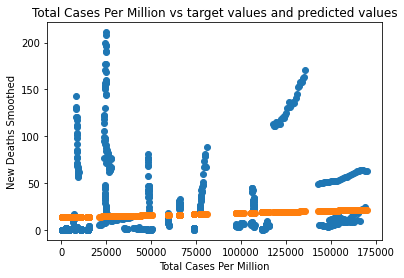

In [6]:
r2, mse, mae, pred, target, df_features_test, beta = make_model_vs_excel(0.01, np.zeros((2,1)),3300, ["total_cases_per_million"])
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("Total Cases Per Million vs target values and predicted values")
plt.xlabel("Total Cases Per Million")
plt.ylabel("New Deaths Smoothed")

Text(0, 0.5, 'New Deaths Smoothed')

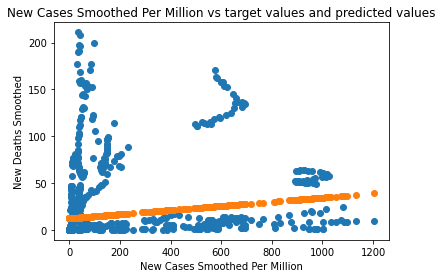

In [7]:
r2, mse, mae, pred, target, df_features_test, beta = make_model_vs_excel(0.01, np.zeros((2,1)),3300, ["new_cases_smoothed_per_million"])
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("New Cases Smoothed Per Million vs target values and predicted values")
plt.xlabel("New Cases Smoothed Per Million")
plt.ylabel("New Deaths Smoothed")

Text(0, 0.5, 'New Deaths Smoothed')

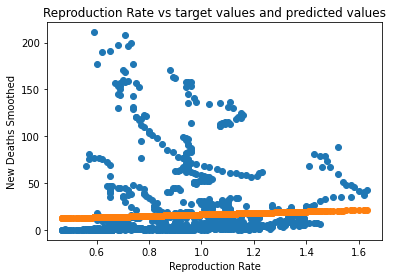

In [8]:
r2, mse, mae, pred, target, df_features_test, beta = make_model_vs_excel(0.01, np.zeros((2,1)),3300, ["reproduction_rate"])
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("Reproduction Rate vs target values and predicted values")
plt.xlabel("Reproduction Rate")
plt.ylabel("New Deaths Smoothed")

Text(0, 0.5, 'New Deaths Smoothed')

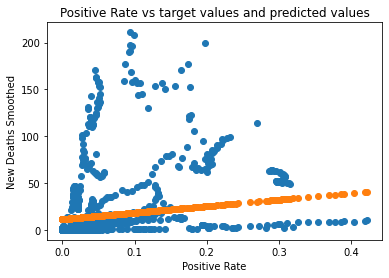

In [9]:
r2, mse, mae, pred, target, df_features_test, beta = make_model_vs_excel(0.01, np.zeros((2,1)),3300, ["positive_rate"])
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("Positive Rate vs target values and predicted values")
plt.xlabel("Positive Rate")
plt.ylabel("New Deaths Smoothed")

# Part 2

### Overview About the Problem

### Discover

The covid-19 pandemic has presented us with many new challenges through the last 2 year, to adapt to these ever changing conditions, we need to be able to adapt and constantly come up with new solutions to tackle these issues. To do so, we need to determine when is the ideal time to start our ideas and seize the opportunities in this uncertain time.

### Define

We start in Singapore, where we are most familiar with. It is important to know when we will be able to flatten the curve so as to open up our economy, social activities in our community given the our vaccinations rates, new daily cases and our government's stance.

### Develop

To do so, we came up with a multiple linear regression model to calculate what would the stringency index be in Singapore given our current conditions based on our past experiences with the virus. This would allow us to have a good idea of when Singapore would be able to ease our businesses and daily activities and resume our normal lives.

### Deliver

We shall provide a model to allow users to key in various parameters to calculate Singapore's expected stringency index



# Problem Statement

### Given a rise in covid-19 cases, the Singaporean Government would always take the necessary precautions to prevent an unpreceeded rise in COVID-19 transmission. This increases the Stringency Index significantly as workplaces, schools closes. In such a case, what would the stringency index of Singapore be?

### Dataset

Describe here your data set. Put the link to the sources of your dataset. Describe your data and what are the columns.

Put some Python codes here to describe and visualize your data.

### Data

#### Link to data source: https://github.com/owid/covid-19-data/tree/master/public/data

#### Why is this data used?
1. Sources are clearly documented, for example, all data under Singapore comes directly from Ministry of Health, Singapore, which ensures that data is accurate and not tweaked or false
2. Contains very little missing values and it updated daily
    - Ensures that the data given is current with little errors
    - Missing data is filled using growth trendline analysis using excel
   - Ensures a growth trend in data such as vaccinations rates using values before and after, which can only be increasing
   - Obvious data is filled manually, such as where vaccinated numbers are all 0 before vaccines are introduced
3. Provides a large variety of parameters
    - Ensures that we have a diverse range of parameters to accurately train our model
    - Provides smoothed values to ensure no abnormal values
      - 0 vaccinations prior to discovery of vaccinations and deflivery to Singapore on 31 Dec 2020  


**1. Import data from csv folder**

In [10]:
df = pd.read_csv("Data/Task 2/Singapore_Covid_Data_csv.csv")
display(df)

,location,date,new_cases_smoothed_per_million,total_cases_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed_per_thousand,positive_rate,people_fully_vaccinated_per_hundred,stringency_index,Unnamed: 10
0,Singapore,1/3/2020,0.445,0.183,0.000,0.56,0.000,0.000,0.000,30.56,NaN
1,Singapore,2/3/2020,0.498,0.550,0.000,0.54,0.000,0.000,0.000,30.56,NaN
2,Singapore,3/3/2020,0.498,0.550,0.000,0.53,0.000,0.000,0.000,30.56,NaN
3,Singapore,4/3/2020,0.445,0.733,0.000,0.57,0.000,0.000,0.000,30.56,NaN
4,Singapore,5/3/2020,0.629,0.917,0.000,0.73,0.000,0.000,0.000,30.56,NaN
...,...,...,...,...,...,...,...,...,...,...,...
609,Singapore,31/10/2021,673.998,15193.634,0.288,0.97,4.130,0.163,86.405,44.44,NaN
610,Singapore,1/11/2021,655.556,15496.186,0.367,0.94,4.130,0.159,86.445,44.44,NaN
611,Singapore,2/11/2021,661.293,15760.782,0.419,0.92,3.976,0.166,86.485,44.44,NaN
612,Singapore,3/11/2021,617.050,16116.327,0.472,0.90,3.822,0.161,86.525,44.44,NaN


### Features and Target Preparation

Describe here what are the features you use and why these features. Put any Python codes to prepare and clean up your features. 

Do the same thing for the target. Describe your target and put any codes to prepare your target.

**2. Create single function to make model**

#### Model

Features considered:
1. new_cases_smoothed_per_million
    - The number of new cases directly corresponds to the community transmission of COVID-19, giving a clear indication of the prevalence of virus in the community
    - Higher number of new cases signals high transmission rates in the community, leading to higher stringency index to keep new cases low
2. total_cases_per_millon
    - Total numnber of infected individuals is an indication of how many people in the community have natural immunity to COVID-19
    - Higher total cases will lead to herd immnunity, leading to lower stringency index
3. new_deaths_smoothed_per_million
    - Indicates the number of new deaths, an important indicator that is in line with Singapore's stance to be COVID resilient with keeping daily death rates low
    - Higher death rates will signal that the virus is becoming more deadly, leading to a higher stringency index to keep people safe
4. new_tests_smoothed_per_thousand
    - Indicates the number of test done each day, a higher number of testing done will help to ensure that positive cases are picked up earlier and therefore isolated and reduce the spread of the virus
    - Higher number of new tests will lower transmissibility leading to stringency index lowering
5. positive_rate
    - Indicates the percentage of test done that are positive, will give an indication of how many cases are there in the community that is transmitted without being picked up
    - Higher postive rates with higher reservoir of undetected cases will lead to stringency index increasing
6. people_fully_vaccinated_per_hundred
    - Indicates how many people are fully vaccinated and therefore lowering the chances of death as well as having a shorter infectious period, leading to slower transmission rates
    - Higher vaccination rates gives lower death rate and lower transmissibility will likely lead to lower stringency index
    
    
Target:

1. Stringency Index
    - Composite measure based on 9 response indicators including school closures, workplace closures, and travel bans rescaled to a value from 0 to 100 (100 = strictest)
    - Overall good indicator of the level of restrictions that are imposed on people living in a certain area

**2.1 Codes used to prepare features and targets**



1. get_features_targets()
    - Get dataframe with features and target columns

2. split_data()
    - Split data sets into training and test sets
    
3. normalize-Z()
    - Normalize data set

4. prepare_feature() & prepare_target()
    - Prepare datasets for training model

### Building Model

Describe your model. Is this Linear Regression or Logistic Regression? Put any other details about the model. Put the codes to build your model.

1. Uses gradient descent to derive optimal beta values
2. Use optimal beta values to predict r<sup>2</sup> values, Mean Squared Error, Mean Absolute Error and Beta Coefficients

In [11]:
# single function to make the model
# @args
# 1. alpha-value (step for gradient descent)
# 2. beta (starting beta values for gradient descent)
# 3. iterations (number of iterations of gradient descent)
# 4. start (starting row)
# 5. end (last row)
# 6. feature_parameters (features used to train model)
# @return r^2 and mse values + mae value

def make_model(alpha, beta, iterations,start=46,end=None, feature_parameters =["new_cases_smoothed_per_million","total_cases_per_million","new_deaths_smoothed_per_million", "reproduction_rate", "new_tests_smoothed_per_thousand","people_fully_vaccinated_per_hundred","positive_rate"], dataset = "Data/Task 2/Singapore_Covid_Data_csv.csv" , target_column = ["stringency_index"]):
    df = pd.read_csv(dataset)
    
    # Extract the features and the target
    df_features_original_train, df_target = get_features_targets(df.loc[start:end,:],feature_parameters,target_column)

    # Split the data set into training and test
    df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features_original_train,df_target,100,0.3)

    # Normalize the features using z normalization
    df_features_train_z = normalize_z(df_features_train)

    # Change the features and the target to numpy array using the prepare functions
    X = prepare_feature(df_features_train_z)
    target = prepare_target(df_target_train)

    # Call the gradient_descent function
    beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

    # call the predict() method
    pred = predict(df_features_test,beta)

    target = prepare_target(df_target_test)
    r2 = r2_score(target,pred)
    mse = mean_squared_error(target, pred)
    mae = mean_absolute_error(target, pred)
    # print(f"r^2 value = {r2}, mean squared error = {mse}, mean absolute error = {mae}, beta coefficients = {beta}")
    return r2, mse, mae, beta, pred, target, df_features_test

### Evaluating the Model

Describe your metrics and how you want to evaluate your model. Put any Python code to evaluate your model. Use plots to have a visual evaluation.

r2_value = 0.0034459523175294215, mse_value = 75.98249371436289, mae_value = 0.2300245344372426


Text(0, 0.5, 'Stringency Index')

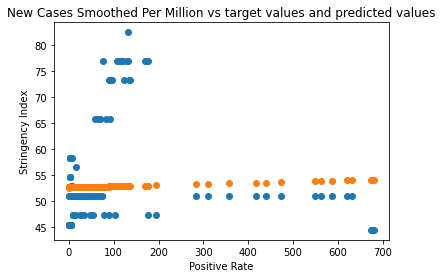

In [12]:
r2_value, mse_value, mae_value, beta, pred, target, df_features_test = make_model(0.01,np.zeros((2, 1)),3300, 46, None, ["new_cases_smoothed_per_million"])
print(f"r2_value = {r2_value}, mse_value = {mse_value}, mae_value = {mae_value}")
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("New Cases Smoothed Per Million vs target values and predicted values")
plt.xlabel("Positive Rate")
plt.ylabel("Stringency Index")

r2_value = 0.7305709516036634, mse_value = 20.542680072244636, mae_value = 0.230024534437236


Text(0, 0.5, 'Stringency Index')

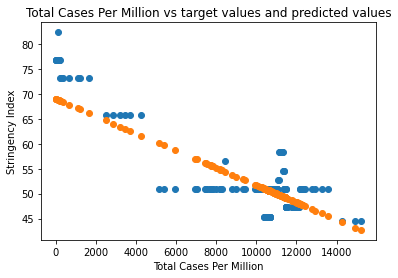

In [13]:
r2_value, mse_value, mae_value, beta, pred, target, df_features_test = make_model(0.01,np.zeros((2, 1)),3300, 46, None, ["total_cases_per_million"])
print(f"r2_value = {r2_value}, mse_value = {mse_value}, mae_value = {mae_value}")
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("Total Cases Per Million vs target values and predicted values")
plt.xlabel("Total Cases Per Million")
plt.ylabel("Stringency Index")

r2_value = 0.016764440933634606, mse_value = 74.96702247132153, mae_value = 0.2300245344372426


Text(0, 0.5, 'Stringency Index')

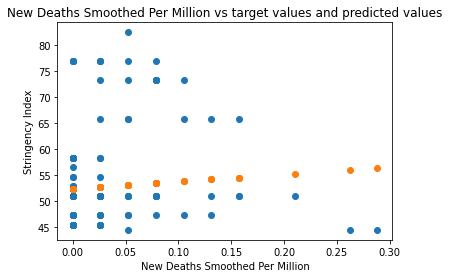

In [14]:
r2_value, mse_value, mae_value, beta, pred, target, df_features_test = make_model(0.01,np.zeros((2, 1)),3300, 46, None, ["new_deaths_smoothed_per_million"])
print(f"r2_value = {r2_value}, mse_value = {mse_value}, mae_value = {mae_value}")
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("New Deaths Smoothed Per Million vs target values and predicted values")
plt.xlabel("New Deaths Smoothed Per Million")
plt.ylabel("Stringency Index")

r2_value = -0.00017666717928621622, mse_value = 76.25870117524917, mae_value = 0.23002453443724244


Text(0, 0.5, 'Stringency Index')

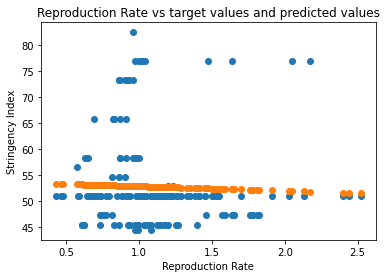

In [15]:
r2_value, mse_value, mae_value, beta, pred, target, df_features_test = make_model(0.01,np.zeros((2, 1)),3300, 46, None, ["reproduction_rate"])
print(f"r2_value = {r2_value}, mse_value = {mse_value}, mae_value = {mae_value}")
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("Reproduction Rate vs target values and predicted values")
plt.xlabel("Reproduction Rate")
plt.ylabel("Stringency Index")

r2_value = 0.13754080851970163, mse_value = 65.75840040782866, mae_value = 0.2300245344372426


Text(0, 0.5, 'Stringency Index')

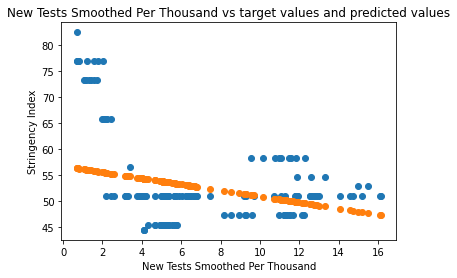

In [16]:
r2_value, mse_value, mae_value, beta, pred, target, df_features_test = make_model(0.01,np.zeros((2, 1)),3300, 46, None, ["new_tests_smoothed_per_thousand"])
print(f"r2_value = {r2_value}, mse_value = {mse_value}, mae_value = {mae_value}")
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("New Tests Smoothed Per Thousand vs target values and predicted values")
plt.xlabel("New Tests Smoothed Per Thousand")
plt.ylabel("Stringency Index")

r2_value = 0.05664315174774859, mse_value = 71.92646094752169, mae_value = 0.23002453443724227


Text(0, 0.5, 'Stringency Index')

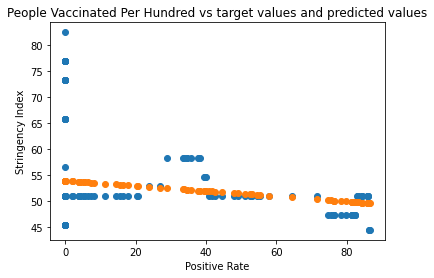

In [17]:
r2_value, mse_value, mae_value, beta, pred, target, df_features_test = make_model(0.01,np.zeros((2, 1)),3300, 46, None, ["people_fully_vaccinated_per_hundred"])
print(f"r2_value = {r2_value}, mse_value = {mse_value}, mae_value = {mae_value}")
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("People Vaccinated Per Hundred vs target values and predicted values")
plt.xlabel("Positive Rate")
plt.ylabel("Stringency Index")

r2_value = 0.37501663271173313, mse_value = 47.652001300879775, mae_value = 0.2300245344372442


Text(0, 0.5, 'Stringency Index')

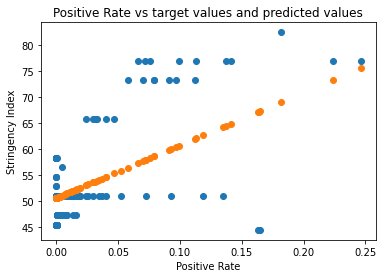

In [18]:
r2_value, mse_value, mae_value, beta, pred, target, df_features_test = make_model(0.01,np.zeros((2, 1)),3300, 46, None, ["positive_rate"])
print(f"r2_value = {r2_value}, mse_value = {mse_value}, mae_value = {mae_value}")
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("Positive Rate vs target values and predicted values")
plt.xlabel("Positive Rate")
plt.ylabel("Stringency Index")

### From the above graphs and R<sup>2</sup> values, we can conclude that the above features generally follows a linear trend

### Improving the Model

Discuss any steps you can do to improve the models. Put any python codes. You can repeat the steps above with the codes to show the improvement in the accuracy. 

To further improve our model, we decided to create a new function that is able to take in parameters to selectively tweak certain parameters to allow us to compare a range of values more efficiently

Here are the features that we used to evaluate our model:
1. Entire Dataset vs Selective Dataset
2. Alpha values
3. Beta values
4. Number of iterations
5. Different features used for training

### Include entire data set vs using only specific values 

In [19]:
## include entire dataset, consisting of all values
r2_value, mse_value, mae_value, beta, pred, target, df_features_test = make_model(0.01,np.zeros((8, 1)),3300, 0, None)
print(f"r2_value = {r2_value}, mse_value = {mse_value}, mae_value = {mae_value}")


r2_value = 0.435563298045034, mse_value = 45.638099434916036, mae_value = 1.0298599595547575


In [20]:
## change in dataset to include only targeted dataset
r2_value, mse_value, mae_value, beta, pred, target, df_features_test = make_model(0.01,np.zeros((8, 1)),3300, 46, None)
print(f"r2_value = {r2_value}, mse_value = {mse_value}, mae_value = {mae_value}")

r2_value = 0.8519373130537825, mse_value = 11.289073790212793, mae_value = 0.23002453443723622


### Testing Alpha Values

,alpha_range,r2_value_range,mse_value_range,mae_value_range
0,0.001,0.747319,19.265738,2.172026
1,0.010,0.851937,11.289074,0.230025
2,0.050,0.851984,11.285510,0.230025
3,0.100,0.851984,11.285510,0.230025


[Text(0.5, 1.0, 'Model Metrics against alpha value'), Text(0, 0.5, '')]

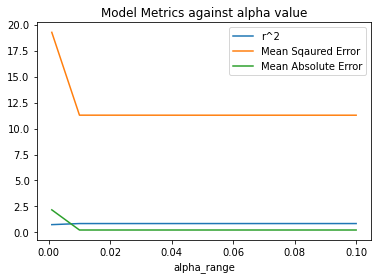

In [21]:
## test for changes to alpha value
alpha_range = [0.001, 0.01, 0.05, 0.1]
r2_value_range = []
mse_value_range = []
mae_value_range = []
for i in alpha_range:
    r2_value, mse_value, mae_value, beta, pred, target, df_features_test = make_model(i,np.zeros((8,1)),3300, 46, None)
    r2_value_range.append(r2_value)
    mse_value_range.append(mse_value)
    mae_value_range.append(mae_value)
data = pd.DataFrame(list(zip(alpha_range, r2_value_range, mse_value_range, mae_value_range)))
data.columns = ["alpha_range", "r2_value_range", "mse_value_range", "mae_value_range"]
display(data)
sns.lineplot(data = data,x="alpha_range", y="r2_value_range", label = "r^2")
sns.lineplot(data = data,x="alpha_range", y="mse_value_range", label = "Mean Sqaured Error")
sns.lineplot(data = data,x="alpha_range", y="mae_value_range", label = "Mean Absolute Error").set(title="Model Metrics against alpha value", ylabel = "")


# r^2 and mse values become significantly more accurate after 0.01 alpha value

### Testing Beta Values

In [22]:
beta_range = [np.zeros((8,1)),np.ones((8,1)),np.full((8,1),5),np.full((8,1),10)]
r2_value_range = []
mse_value_range = []
mae_value_range = []
for i in beta_range:
    r2_value, mse_value, mae_value, beta, pred, target, df_features_test = make_model(0.01,i,3300, 46, None)
    r2_value_range.append(r2_value)
    mse_value_range.append(mse_value)
    mae_value_range.append(mae_value)
data = pd.DataFrame(list(zip(beta_range, r2_value_range, mse_value_range, mae_value_range)))
data.columns = ["beta_range", "r2_value_range", "mse_value_range", "mae_value_range"]
display(data)
# staring beta value makes little difference
# mean squared error is the lowest when beta_range is np.zeros((8,1))

,beta_range,r2_value_range,mse_value_range,mae_value_range
0,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",0.851937,11.289074,0.230025
1,"[[1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1....",0.851927,11.289851,0.230025
2,"[[5], [5], [5], [5], [5], [5], [5], [5]]",0.851886,11.292977,0.230025
3,"[[10], [10], [10], [10], [10], [10], [10], [10]]",0.851834,11.296927,0.230025


### Testing Optimal Number of Iterations

,iterations_range,r2_value_range,mse_value_range,mae_value_range
0,100,-4.339631,407.121423,19.534497
1,300,0.697973,23.028140,2.816431
2,500,0.828591,13.069085,0.576550
3,700,0.842572,12.003109,0.276452
4,900,0.847267,11.645144,0.236245
5,1100,0.849394,11.482969,0.230858
6,1300,0.850475,11.400575,0.230136
7,1500,0.851061,11.355872,0.230039
8,1700,0.851395,11.330430,0.230027
9,1900,0.851593,11.315337,0.230025


[Text(0.5, 1.0, 'Model Metrics against number of iterations'),
 Text(0, 0.5, '')]

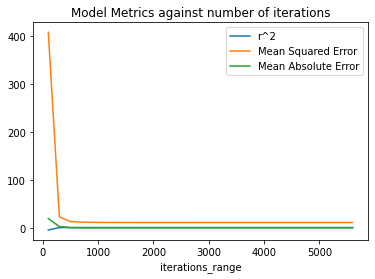

In [23]:
iterations_range = [100,300,500,700,900,1100,1300,1500,1700,1900,2100,2300,2500,2700,2900,3100,3300,3500,3700,3900,4100,4300,4600,4800,5000,5200,5400,5600]
# change in number of iterations
r2_value_range = []
mse_value_range = []
mae_value_range = []
for i in iterations_range:
    r2_value, mse_value, mae_value, beta, pred, target, df_features_test = make_model(0.01,np.zeros((8,1)), i, 46, None)
    r2_value_range.append(r2_value)
    mse_value_range.append(mse_value)
    mae_value_range.append(mae_value)
data = pd.DataFrame(list(zip(iterations_range, r2_value_range, mse_value_range, mae_value_range)))
data.columns = ["iterations_range", "r2_value_range", "mse_value_range", "mae_value_range"]
display(data)
sns.lineplot(data = data,x="iterations_range", y="r2_value_range", label = "r^2")
sns.lineplot(data = data,x="iterations_range", y="mse_value_range", label = "Mean Squared Error")
sns.lineplot(data = data,x="iterations_range", y="mae_value_range", label = "Mean Absolute Error").set(title="Model Metrics against number of iterations", ylabel = "")

# r^2 and mse values become significantly more accurate after 300 iterations
# to reach mse_value with accuracy of up to 2 d.p, you will need to reach 3300 iterations
# iterations_range[16] = 3300 is where the value of mse becomes accurate to 2dp, r2 and mae is similar before that

### Testing Optimal Features to Consider

In [24]:
# use different features to decide if it would improve MSE and r^2 values
features_evaluated = ["total_cases","new_cases","new_cases_smoothed","total_deaths","new_deaths","new_deaths_smoothed","total_cases_per_million","new_cases_per_million","new_cases_smoothed_per_million","total_deaths_per_million","new_deaths_per_million","new_deaths_smoothed_per_million","reproduction_rate","new_tests_smoothed","new_tests_smoothed_per_thousand","positive_rate","tests_per_case", "total_cases"]
r2_value_range = []
mse_value_range = []
mae_value_range = []
for i in range(1,len(features_evaluated)):
    # print(features_evaluated[i])
    r2_value, mse_value, mae_value, beta, pred, target, df_features_test = make_model(0.01, np.zeros((i+1,1)), 3300, 46, None, features_evaluated[0:i], "Data/Task 2/singapore_covid_data_total_feature.csv")
    r2_value_range.append(r2_value)
    mse_value_range.append(mse_value)
    mae_value_range.append(mae_value)

# create new array for new col for mse change
r2_value_change = ["NIL"]
for value in range(1,len(r2_value_range)):
    prev_value = r2_value_range[value-1]
    current_value = r2_value_range[value]
    difference_r2 = current_value - prev_value
    if difference_r2 < 0.1:
        difference_r2 = "NSR"
    r2_value_change.append(difference_r2)
# create new array for new col for mse change
mse_value_change = ["NIL"]
for value in range(1,len(mse_value_range)):
    prev_value = mse_value_range[value-1]
    current_value = mse_value_range[value]
    difference_mse = current_value - prev_value
    if difference_mse > -1:
        difference_mse = "NSR"
    mse_value_change.append(difference_mse)
# create new array for new col for mae change
mae_value_change = ["NIL"]
for value in range(1,len(mae_value_range)):
    prev_value_mae = mae_value_range[value-1]
    current_value_mae = mae_value_range[value]
    difference_mae = current_value_mae - prev_value_mae
    if difference_mae > -1:
        difference_mae = "NSR"
    mae_value_change.append(difference_mae)
    

data = pd.DataFrame(list(zip(features_evaluated, r2_value_range, mse_value_range, mae_value_range,r2_value_change, mse_value_change, mae_value_change)))
data.columns = ["features_evaluated", "r2_value_range", "mse_value_range", "mae_value_range","r2_value_change", "mse_value_difference","mae_value_change"]
display(data)

# NSR = No Significant Reduction

,features_evaluated,r2_value_range,mse_value_range,mae_value_range,r2_value_change,mse_value_difference,mae_value_change
0,total_cases,0.254293,53.668781,0.031019,NIL,NIL,NIL
1,new_cases,0.634051,26.337503,0.031019,0.379757,-27.331278,NSR
2,new_cases_smoothed,0.700802,21.533367,0.031019,NSR,-4.804137,NSR
3,total_deaths,0.763901,16.992118,0.031019,NSR,-4.541249,NSR
4,new_deaths,0.763923,16.990543,0.031019,NSR,NSR,NSR
5,new_deaths_smoothed,0.766198,16.826801,0.031019,NSR,NSR,NSR
6,total_cases_per_million,0.770817,16.494357,0.031019,NSR,NSR,NSR
7,new_cases_per_million,0.770738,16.500106,0.031019,NSR,NSR,NSR
8,new_cases_smoothed_per_million,0.770698,16.502936,0.031019,NSR,NSR,NSR
9,total_deaths_per_million,0.772648,16.362630,0.031019,NSR,NSR,NSR


### Discussion and Analysis

Discuss your model and accuracy in solving the problem. Analyze the results of your metrics. Put any conclusion here.

## As shown in the table above, certain features does not result in a significant difference. Having additional features also adds to the computational complexity of the model, thus we remove such features.


#### Features that result in a significant difference are:
1. total_cases
2. new_cases
3. new_cases_smoothed
4. total_deaths
5. new_tests_smoothed

In such cases where many features result in no/very little reduction in the mean squared error of the model, we do not include it into our model as every feature considered will result in additional computational complexity, which would require a significantly higher amount of resources as the model gets larger.

Moreover, using only these 5 features also resulted in a Mean Absolute Value (0.031) that is lower than our initial model (0.230).

It is important that we optimise our model using the least amount of features to only include those that will siginificantly affect our model and to reduce our computational complexity.

In [25]:
r2_value, mse_value, mae_value, beta, pred, target, df_features_test = make_model(0.01, np.zeros((6,1)), 3300, 46, None, ["total_cases","new_cases", "new_cases_smoothed", "total_deaths","new_tests_smoothed"],"Data/Task 2/singapore_covid_data_total_feature.csv")
print(f"r2_value = {r2_value}, mse_value = {mse_value}, mae_value = {mae_value}")

r2_value = 0.784247704602924, mse_value = 15.52777210035001, mae_value = 0.031019214703775083


In [26]:
alpha = 0.01
iterations = 3300
beta = np.zeros((8,1))

r2_value, mse_value, mae_value, beta, pred, target, df_features_test = make_model(alpha, beta, iterations)
print(f"r2_value = {r2_value}, mse_value = {mse_value}, mae_value = {mae_value}")

r2_value = 0.8519373130537825, mse_value = 11.289073790212793, mae_value = 0.23002453443723622


# Therefore, we conclude that to obtain an accurate model in large datasets we should use the improved model. However, if we are given less datasets and we can afford the computational complexity, we can afford to use our initial model which is more accurate to obtain our prediction results

## Create function to test model through input values

- Since we are working with a small dataset, time complexity and computational complexity would make little difference, it would be logical to use the initial model which is more accurate

In [27]:
dataset_main = pd.read_csv("Data/Task 2/Singapore_Covid_Data_csv.csv")
def col_normalized( feature, value,dataset = dataset_main):
    norm_val = (value - dataset[feature].mean(axis=0)) / dataset[feature].std(axis=0)
    return norm_val

features_input = [col_normalized("new_cases_smoothed_per_million", 24.597), col_normalized("total_cases_per_million", 11423.83),col_normalized("new_deaths_smoothed_per_million", 0.026),col_normalized("reproduction_rate", 1.91),col_normalized("new_tests_smoothed_per_thousand", 12.81),col_normalized("people_fully_vaccinated_per_hundred",53.13),col_normalized("positive_rate", 0.002)]

# Predict model using normalized features
def predict_model1(features_input):
    sum = 0
    sum += beta[0]
    for i in range(1,len(beta)):
        sum += beta[i]*features_input[i-1]
    return sum[0]

In [28]:
predict_model1(features_input)

51.030254544769285